In [1]:
import pandas as pd

import nltk
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df_lyric = pd.read_csv('./cinta_lyrics.csv')
df_lyric

,name,artist,lyric
0,Ku cinta kau lebih dari kemarin,Abdul dan Coffee theory,Maafkanku bila\nKu kurang romantis\nTak segomb...
1,Selalu Ada,Abdul dan Coffee theory,Saat aku sendiri kuteringat wajahmu\nDengan ba...
2,Aku Suka Caramu,Abdul dan Coffee theory,Aku suka caramu membuatku tersenyum\nSaat hari...
3,Agar kau mengerti,Abdul dan Coffee theory,Aku tak pernah bisa\nTuk kau beri dunia\nAku t...
4,Lagi Lagi Kamu,Abdul dan Coffee theory,Ku sadari aku yang membuat kita berpisah\nKu s...
...,...,...,...
721,TEST DRIVE,Joji,She don't wanna tell lies\n(She don't wanna te...
722,SLOW DANCING IN THE DARK,Joji,I don't want a friend\nI want my life in two (...
723,WANTED U,Joji,Here I am\nTorn into a thousand shapes and fol...
724,WHY AM I STILL IN LA (feat. Shlohmo & D33J),Joji,"Girl, you choke me sitting airtight (airtight)..."


# Cleaning Data

In [3]:
# Hilangi baris yang ada null dan empty string
nan_value = float('NaN')
df_lyric.replace('', nan_value, inplace=True)
df_lyric.dropna(subset=['lyric'], inplace=True)

df_lyric.head()

,name,artist,lyric
0,Ku cinta kau lebih dari kemarin,Abdul dan Coffee theory,Maafkanku bila\nKu kurang romantis\nTak segomb...
1,Selalu Ada,Abdul dan Coffee theory,Saat aku sendiri kuteringat wajahmu\nDengan ba...
2,Aku Suka Caramu,Abdul dan Coffee theory,Aku suka caramu membuatku tersenyum\nSaat hari...
3,Agar kau mengerti,Abdul dan Coffee theory,Aku tak pernah bisa\nTuk kau beri dunia\nAku t...
4,Lagi Lagi Kamu,Abdul dan Coffee theory,Ku sadari aku yang membuat kita berpisah\nKu s...


# Data Exploration

In [4]:
# Printing the name of the artists inside the lyric data
print('Artists in the data:\n', df_lyric.artist.value_counts())

Artists in the data:
 One Direction           33
Repvblik                29
Ariana Grande           28
Papinka                 28
Taylor Swift            23
                        ..
Marion Jola              1
Maliq & D'essentials     1
Mahalini                 1
M.E                      1
Obbie Messakh\n          1
Name: artist, Length: 123, dtype: int64


In [5]:
# Printing the size of the dataset
print('Shape of the lyrics data:', df_lyric.shape)

Shape of the lyrics data: (726, 3)


In [6]:
import re

df_lyric['no_of_characters'] = df_lyric['lyric'].apply(len)
df_lyric['no_of_words'] = df_lyric['lyric'].apply(lambda row: len(nltk.word_tokenize(row)))
df_lyric['no_of_line'] = df_lyric['lyric'].apply(lambda row: len(row.split('\n')))

df_lyric.describe()

,no_of_characters,no_of_words,no_of_line
count,726.000000,726.000000,726.000000
mean,1362.020661,294.217631,43.053719
std,937.522470,241.964818,22.771698
min,5.000000,1.000000,1.000000
25%,797.250000,129.250000,29.000000
50%,1054.500000,192.500000,39.000000
75%,1715.500000,412.500000,51.000000
max,7971.000000,1839.000000,177.000000


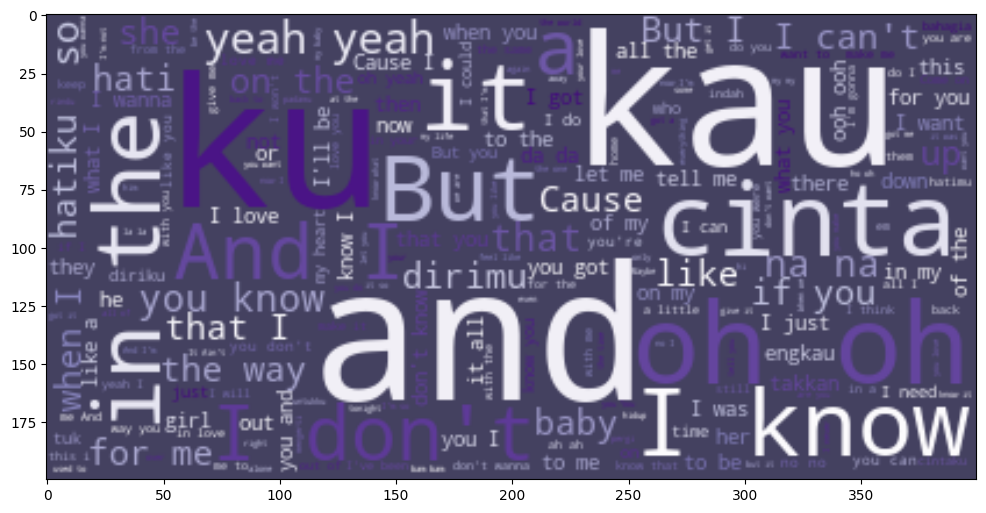

In [7]:
from nltk.corpus import stopwords

# Generate a word cloud image
stopwords = set(stopwords.words('indonesian'))
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(df_lyric["lyric"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()